# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<br/>
<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

<br/>
<br/>

<center><i><b>
Atenção: não são autorizadas cópias, divulgações ou qualquer tipo de uso deste material sem o consentimento prévio dos autores.
</center></i></b>

# <center>Exercício - $k$-vizinhos mais próximos</center>

Instruções
----------

Este arquivo contém o código que auxiliará no desenvolvimento do exercício. Você precisará completar as seguintes funções:

* <tt>normalizacao()</tt>
* <tt>distancia()</tt>
* <tt>knn()</tt>

Você não poderá criar nenhuma outra função e nem importar outras bibliotecas. Apenas complete as rotinas fornecidas.

## Introdução

Você foi contratado por uma grande empresa de cosméticos para desenvolver um método para classificar diferentes espécies de uma flor. Essencialmente, a empresa está interessada em separar automaticamente espécies de uma flor chamada Iris. Esse tipo de flor é composta por três espécies: **Setosa**, **Virginica** e **Versicolour**, apresentadas na Figura 1. As duas primeiras (Setosa e Virginica) possuem propriedades aromáticas de interesse da empresa, já a última (Versicolour) não pode ser utilizada.

Devido à forte semelhança visual entre elas, ocorreu a ideia de que, talvez, seja possível detectar cada espécie pelas medidas de comprimento e largura das pétalas. Com base nessa informação, a empresa criou duas base de dados pré-classificadas (Setosa + Versicolour e Virginica + Versicolour) com as respectivas medidas das pétalas das flores. A sua função é implementar o método do $K$-vizinhos mais próximos para determinar a espécie de uma Iris a partir dos dados das pétalas.

<br>
<br>

<center>
<div style="display:inline-block;">
    <div>
    <div style="padding: 5px; float: left;">
        <img src="figs/iris_setosa.jpeg" style="height:180px;"/>
        <center><em>(a) Setosa</em></center>
    </div>
    <div style="padding: 5px; float: left;">
        <img src="figs/iris_virginica.jpeg"  style="height:180px;"/> 
        <center><em>(b) Virginica</em></center>
    </div>
    <div style="padding: 5px; float: left;">
        <img src="figs/iris_versicolour.jpeg"  style="height:180px;"/>
        <center><em>(c) Versicolour</em></center>
    </div>
    </div>
    <center><em>Figura 1. Espécies de Iris.</em></center>
</div> 
</center>



## Parte 1: Visualização dos dados

Muitas vezes, a visualização dos dados auxilia na interpretação dos mesmos
e como eles estão distribuídos. Nesta etapa, você precisa completar a
função de normalização dos atributos ( <tt>normalizacao()</tt> ).

Primeiro, vamos carregar os dados do arquivo.

In [1]:
# -*- coding: utf-8 -*-

# Caminho dos arquivos
FILES_DIRECTORY = 'dados'

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import os # importa a biblioteca para tarefas relacionadas ao sistema operacional

if __name__ == '__main__':
    # Importa o arquivo e guarda em um dataframe do Pandas
    df_dataset = pd.read_csv(os.path.join(FILES_DIRECTORY, 'dados.csv'), sep=',', index_col=None)

    print('Dados carregados com sucesso!')

Dados carregados com sucesso!


Agora, vamos dar uma olhada nas cinco primeiras amostras da base de dados.

In [2]:
if __name__ == '__main__':
    # vamos usar a função display para imprimir o dataframe. 
    # Obs: poderíamos ter usado a função print: print(df_dataset.head(n=5))
    display(df_dataset.head(n=5))

,largura_petala,comprimento_petala,classe
0,4.9,3.1,0
1,4.4,3.0,0
2,5.7,4.4,0
3,5.5,4.2,0
4,4.9,3.1,0


Agora, vamos guardar os dados dentro de uma matriz e as classes dentro de um vetor. As cinco primeiras linhas da matriz de dados e do vetor de classes serão exibidos.

In [3]:
if __name__ == '__main__':
    # Pega os valores das n-1 primeiras colunas e guarda em uma matrix X
    X = df_dataset.iloc[:, 0:-1].values 
    
    # Pega os valores da ultima coluna e guarda em um vetor Y
    Y = df_dataset.iloc[:, -1].values 
    
    # Imprime as 5 primeiras linhas da matriz X
    display('X:', X[0:5,:])
    
    # Imprime os 5 primeiros valores de Y
    print('Y:', Y[0:5])

'X:'

array([[4.9, 3.1],
       [4.4, 3. ],
       [5.7, 4.4],
       [5.5, 4.2],
       [4.9, 3.1]])

Y: [0 0 0 0 0]


Agora, vamos criar uma função para plotar os dados.

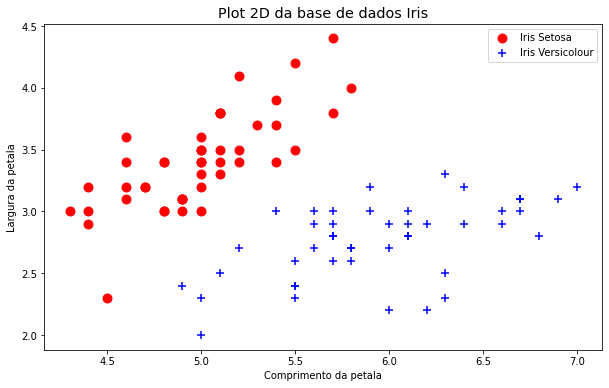

In [4]:
if __name__ == "__main__":
    # Importando a biblioteca matplotlib
    import matplotlib.pyplot as plt
    
# Criando a função para plotar os dados
def visualizarDados(X,Y, nome_classe0, nome_classe1):        
    """
    Função usada para plotar os dados
    """
        
    # definindo o tamanho da figura 
    plt.figure(figsize=(10,6))

    # plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label=nome_classe0, marker='o', color='red', s=80) 

    # plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label=nome_classe1, marker='+', color='blue', s=80) 

    # define os nomes dos eixos x e y
    plt.xlabel(r'Comprimento da petala',fontsize='medium') 
    plt.ylabel(r'Largura da petala',fontsize='medium') 

    # plota a legenda
    plt.legend()

    # define o título do gráfico
    plt.title('Plot 2D da base de dados Iris', fontsize='x-large')

    
if __name__ == '__main__':
    # Chamando a função que plota os dados   
    visualizarDados(X,Y, 'Iris Setosa', 'Iris Versicolour')

    # exibe o grafico
    plt.show()

Como a distância entre as amostras pode ser influenciada pela escala
dos atributos, é recomendável que os atributos sejam normalizados de
forma que a média ($\mu$) seja igual a 0 e desvio padrão ($\sigma$) igual a 1. Complete 
a função abaixo, responsável por normalizar os dados.

In [5]:
def normalizar(X):
    """
    Normaliza os atributos em X
    
    Esta função retorna uma versao normalizada de X onde o valor da
    média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
    um importante passo de pré-processamento quando trabalha-se com 
    métodos de aprendizado de máquina.
    """
    
    m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto
    
    # Inicializa as variaves de saída
    X_norm = np.zeros( (m,n) ) #inicializa X_norm (base normalizada)
    mu = 0 # inicializa a média
    sigma = 1 # inicializa o desvio padrão
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instruções: Calcule a média de cada atributo de X e armazene em mu. Note
    #          que se X for uma matriz (m x n), então mu terá que ser um
    #          vetor (1 x n), no qual cada coluna de mu deverá conter o 
    #          valor da média de cada um dos n atributos. O mesmo deverá ser
    #          feito para o desvio padrão, que deverá ser armazenado em
    #          sigma. 
    #          Sugestão: use as funções mean e std da biblioteca numpy para  
    #                    calcular a média e o desvio padrão, respectivamente.
    #                    Se você for usar a função do Numpy para calcular o 
    #                    desvio padrão, não se esqueça de usar o parâmetro ddof=1 
    #                    para fazer a correção de Bessel         
    #          Uma vez encontrados os valores de mu e de sigma, calcule o
    #          valor do atributo X normalizado. Para isso, para cada amostra
    #          x_i de X será necessário calcular (x_i - mu)/sigma e
    #          armazenar em X_norm (base de dados normalizada).
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis = 0,ddof=1)

    for i in range(m):
         X_norm[i:] = (X[i:]-mu)/sigma   
    
    
    
    
    
    
    
    
    
    
        
    
    ##########################################################################
    
    return X_norm, mu, sigma


In [6]:
if __name__ == '__main__':
    # Chama a função para normalizar X
    X_norm, mu, sigma = normalizar(X)
    
    print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(X[0,0],X[0,1]))
    print('\nApós a normalização, espera-se que a primeira amostra seja igual a: [-0.8615 0.0326].')
    print('\nPrimeira amostra da base apos normalização: [%2.4f %2.4f].' %(X_norm[0,0],X_norm[0,1]))


Primeira amostra da base antes da normalização: [4.9000 3.1000].

Após a normalização, espera-se que a primeira amostra seja igual a: [-0.8615 0.0326].

Primeira amostra da base apos normalização: [-0.8615 0.0326].


## Parte 2: Cria um novo caso de teste

Abaixo, será criado um novo caso de teste para ser classificado.

In [7]:
if __name__ == '__main__':
    # Definicao do primeiro caso de teste.
    x_teste = np.array(([[5.5, 3.2]])) # Você pode testar outros valores aqui

Vamos plotar essa amostra.

Plotanto caso de teste: [5.5000 3.2000] (quadrado verde do grafico). 



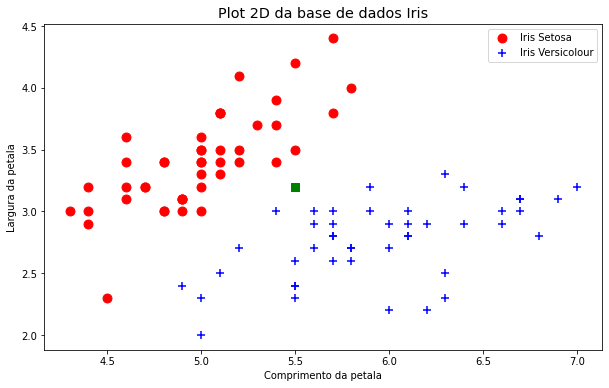

In [8]:
if __name__ == '__main__':
    print('Plotanto caso de teste: [%2.4f %2.4f] (quadrado verde do grafico). \n' %(x_teste[0,0],x_teste[0,1]))

    # Plotando os dados de treinamento 
    visualizarDados(X,Y, 'Iris Setosa', 'Iris Versicolour')

    # Visualizando o caso de teste junto com os dados de treinamento
    plt.scatter( x_teste[0,0], x_teste[0,1], marker='s', color='green', s=80)

    # exibe o grafico
    plt.show()

Agora, vamos normalizar o caso de teste usando os valores de $\mu$ e $\sigma$ já calculados.

In [9]:
if __name__ == '__main__':
    # Normaliza o caso de teste usando os valores de mu e sigma pre-calculados
    x_teste_norm = (x_teste-mu) / sigma
    
    print('\nApós a normalização, espera-se que a amostra de teste seja igual a: [0.0489 0.2422].')
    print('\nAmostra de teste normalizada: [%2.4f %2.4f].' %(x_teste_norm[0,0],x_teste_norm[0,1]))


Após a normalização, espera-se que a amostra de teste seja igual a: [0.0489 0.2422].

Amostra de teste normalizada: [0.0489 0.2422].


## Parte 3: Método dos $k$-vizinhos mais próximos

Nesta etapa, o método dos $k$-vizinhos deverá ser implementado e testado
  para predizer a classe de uma nova amostra. Primeiro, você deverá
  completar a função que calcula a distância Euclidiana entre dois
  vetores quaisquer ( <tt>distancia()</tt> ) e, posteriormente, o código referente ao
  metodo do $k$-NN ( <tt>knn()</tt> ).
  
A distância Euclidiana é calculada usando a seguinte equação: $dist(x,y) = \sqrt{\sum_{i=1}^{n} (x_i-y_i)^2}$.

A equação mostrada acima, também pode ser definida da seguinta forma: $dist(x,y) = \left\Vert x-y \right\Vert_2$.

Nas equações mostradas acima, $x$ e $y$ são vetores que possuem a mesma dimensão ($n$).

Abaixo, você deverá completa a função de distância. Essa função deverá calcular a distância entre $x$ e cada amostra de $X^{(i)}$. Portanto, você pode usar um laço de repetição para calcular o valor em relação a cada $X^{(i)}, i \in {1...m}$.

In [10]:
def distancia(x, X):
    """
    Retorna um vetor de distâncias entre a amostra x 
    e todas as amostras da base X. Cada posição Di = dist(x, Xi).
    """
    
    # Inicializa a variável de retorno e algumas variáveis úteis
    
    m = X.shape[0] # Quantidade de objetos em X
    D = np.zeros(m) # Inicializa a matriz de distâncias D

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instruções: Teoricamente, você poderia usar qualquer função de 
    #          distancia. Porém, para este exercicio, é necessário usar a 
    #          distância Euclidiana (funcao norm).
    # 
    # Obs: use um loop-for para calcular a distância entre o objeto x e cada
    #   amostra Xi de X. O vetor D deverá ter o mesmo número de linhas de X.
    #

    for i in range(m):
        D[i] = np.linalg.norm(x-X[i])
    
    
    
    
    
    ##########################################################################
    
    return D

A função criada acima será usada para calcular as distâncias $D$. Depois, é necessário encontrar os $K$ menores valores de $D$, que correspondem aos objetos (vizinhos) mais próximos da amostra de teste. É preciso selecionar a classe majoritária entre as $K$ amostras da base de dados e, então, usar essa classe para rotular a amostra de teste ($y$). Adicionalmente, você precisará retornar os índices $ind\_viz_{(K \times 1)}$ correspondentes às posições (linhas) dos $K$-vizinhos encontrados em $X$.

Agora, complete a função que calcula o $k$-NN.


**Dica**: 
* chame a função **distancia()** que você criou anteriormente para calcular a distancia entre a amostra $x$ e todas as amostras de treinamento $X$.

In [11]:
def knn(x, X, Y, K):
    """
    Esta função usa o método dos K-vizinhos mais proximos para predizer a classe de um novo
        dado. Ela retorna o rótulo y da amostra x e os índices
        [ind_viz] dos K-vizinhos mais próximos de x em X.
 
        Parâmetros de entrada:
        -> x (1 x n): amostra a ser classificada
        -> X (m x n): base de dados de treinamento
        -> Y (m x 1): conjunto de rótulos de cada amostra de X
        -> K (1 x 1): quantidade de vizinhos mais próximos
 
        Parâmetros de saída:
        -> y (1 x 1): predição (0 ou 1) do rótulo da amostra x
        -> ind_viz (K x 1): índice das K amostras mais próximas de x
                            encontradas em X (da mais próxima para a menos
                            próxima)
    """
    
    # Inicializa a variável de retorno e algumas variáveis uteis
    y = 0 # Inicializa rótulo como sendo da classe negativa
    ind_viz = np.ones(K, dtype=int) # Inicializa índices (linhas) em X das K amostras mais 
                         # próximas de x.
        

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instruções: Implemente o método dos K-vizinhos mais próximos. Primeiro, 
    #         é preciso calcular a distância entre x e cada amostra de X. 
    #         Depois, encontre os K-vizinhos mais próximos e use voto
    #         majoritário para definir o rótulo de x. 
    #
    # Obs: primeiro é necessario implementar a função de distância Euclidiana
    #     (distancia).
    #
    dist = distancia(x,X)
    n = len(pd.unique(Y))
    #aux = np.argpartition(dist, K)
    aux = dist.argsort()
    ind_viz = aux[:K]

    aux_k = np.zeros(n)
    for i in range(K):
        j= Y[ind_viz[i]]
        aux_k[j]+=1

    y = aux_k.argmax()
    
    
    ##########################################################################
    
    return y, ind_viz

Agora, vamos testar o $k$-NN. No código abaixo, você poderá alterar a quantidade de vizinhos (<tt>K</tt>).

In [12]:
if __name__ == '__main__':
    # Define o caso de teste
    x_teste = np.array(([[5.5, 3.2]])) # Você pode testar outros valores aqui

    # Define a quantidade de vizinhos. Recomenda-se que seja ímpar (1, 3, ou 5)
    K = 1 # Você pode testar outros valores aqui

    # Normaliza o caso de teste usando os valores de mu e sigma pre-calculados
    x_teste_norm = (x_teste-mu) / sigma

    # Chama o algoritmo do k-vizinhos para predizer o rótulo da amostra de teste.
    y, ind_viz = knn(x_teste_norm, X_norm, Y, K)

    # Exibe o rótulo da amostra de teste esperado para K=1
    print('\nPara K=1, a resposta esperada seria: Classe 0 ==> Iris Versicolour.\n')

    # Exibe o rótulo da amostra de teste retornado pelo algoritmo KNN
    print('Segundo o KNN, a amostra de teste foi classificada como:')

    # Imprime a espécie da planta de acordo com o rótulo informado
    if y == 0:
        print('\tClasse 0 ==> Iris Versicolour.\n')
    else:
        print('\tClasse 1 ==> Iris Setosa.\n')


Para K=1, a resposta esperada seria: Classe 0 ==> Iris Versicolour.

Segundo o KNN, a amostra de teste foi classificada como:
	Classe 0 ==> Iris Versicolour.



É interessante notar que a alteração no valor de $K$ no código acima, pode alterar a classe predita pelo classificador. Para $K=1$, a amostra de teste é classificada como Iris Versicolour. Porém, para $K=3$ ou $K=5$, a amostra de teste é classificada como Iris Setosa.

Agora, vamos plotar o(s) $k$-vizinho(s) mais próximo(s) usado(s) na classificação.


Plotanto o(s) 1-vizinho(s) mais próximo(s) usado(s) na classificação.




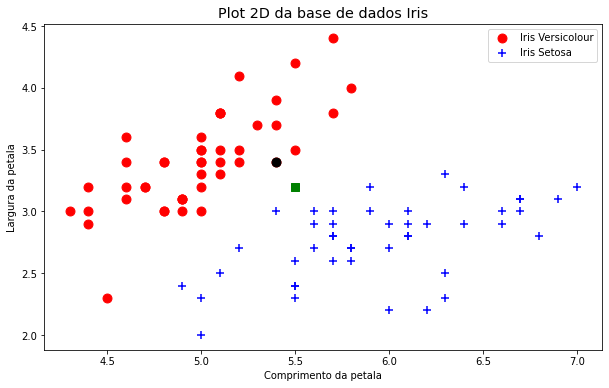

In [13]:
if __name__ == '__main__':
    print('\nPlotanto o(s) %d-vizinho(s) mais próximo(s) usado(s) na classificação.\n\n' %K)

    # Plotando os dados de treinamento 
    visualizarDados(X,Y, 'Iris Versicolour', 'Iris Setosa')

    # Visualizando o caso de teste junto com os dados de treinamento
    plt.scatter( x_teste[0,0], x_teste[0,1], marker='s', color='green', s=80)

    for i in range(K):
        if Y[ind_viz[i]]==0:
            plt.scatter( X[ind_viz[i],0], X[ind_viz[i],1], label="Iris Versicolour", marker='o', color='black', s=80)
        else:
            plt.scatter( X[ind_viz[i],0], X[ind_viz[i],1], label="Iris Setosa", marker='+', color='black', s=80) 

    plt.show()

Vamos dar uma olhada na superfície de decisão aprendida pelo KNN. Troque o valor de $K$ para ver diferentes superficies de decisão.

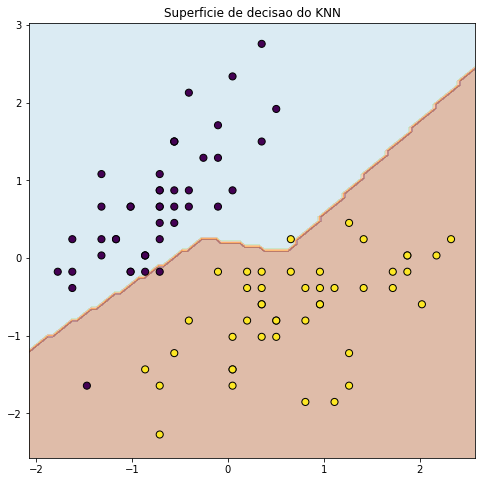

In [14]:
def plota_superficieDecisao(X, Y, K, ax, title = ""):
    h = .05  # tamanho do passo da malha (mesh)

    # cria uma malha (mesh)
    x_min, x_max = X[:, 0].min() - 0.3, X[:, 0].max() + 0.3
    y_min, y_max = X[:, 1].min() - 0.3, X[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    X_teste = np.c_[xx.ravel(), yy.ravel()] 

    Z = np.zeros( X_teste.shape[0] )
    for i in range( X_teste.shape[0] ):

        # Chama o algoritmo do k-vizinhos para predizer o rótulo da amostra de teste.
        Z[i], ind_viz = knn(X_teste[i], X, Y, K)

    # converte os valores do vetor para indices
    Z2 = np.unique(Z, return_inverse=True)[1]

    # plota a superficie de decisao
    Z2 = Z2.reshape(xx.shape)
    ax.contourf(xx, yy, Z2, cmap=plt.cm.Paired, alpha=.4)

    # converte os valores do vetor para indices
    Y2 = np.unique(Y, return_inverse=True)[1]

    # plota os dados de treinamento
    ax.scatter(X[:, 0], X[:, 1], c=Y2, edgecolor='k', s=50)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title, fontsize='large')

    
if __name__ == '__main__':
    # define o tamanho da figura
    fig, ax = plt.subplots(figsize=(8, 8)) 

    # seta o numero de vizinhos
    K=89

    # chama a funcao para plotar a superficie de decisao juntamente com os dados de teste
    plota_superficieDecisao(X_norm, Y, K, ax, title = "Superficie de decisao do KNN")

    plt.show()

## Parte 4: Exemplo usando outra base de dados

Agora, vamos testar o método com um exemplo mais complexo (_Virginica_ x _Versicolor_). 

In [15]:
if __name__ == '__main__':
    # Importa o arquivo e guarda em um dataframe do Pandas
    df_dataset2 = pd.read_csv( os.path.join(FILES_DIRECTORY, 'dados2.csv'), sep=',', index_col=None) 

    # Imprimindo as cinco primeiras amostras
    display(df_dataset.head(n=5))

,largura_petala,comprimento_petala,classe
0,4.9,3.1,0
1,4.4,3.0,0
2,5.7,4.4,0
3,5.5,4.2,0
4,4.9,3.1,0


Novamente, vamos guardar os dados dentro de uma matriz e as classes dentro de um vetor. As cinco primeiras amostras serão exibidas.

In [16]:
if __name__ == '__main__':
    # Pega os valores das n-1 primeiras colunas e guarda em uma matrix X
    X2 = df_dataset2.iloc[:, 0:-1].values 

    # Pega os valores da última coluna e guarda em um vetor Y
    Y2 = df_dataset2.iloc[:, -1].values 

    # Imprime as 5 primeiras linhas da matriz X
    display('X2:', X[0:5,:])

    # Imprime os 5 primeiros valores de Y
    print('Y2:', Y[0:5])

'X2:'

array([[4.9, 3.1],
       [4.4, 3. ],
       [5.7, 4.4],
       [5.5, 4.2],
       [4.9, 3.1]])

Y2: [0 0 0 0 0]


Os dados serão plotados usando a função definida anteriormente.

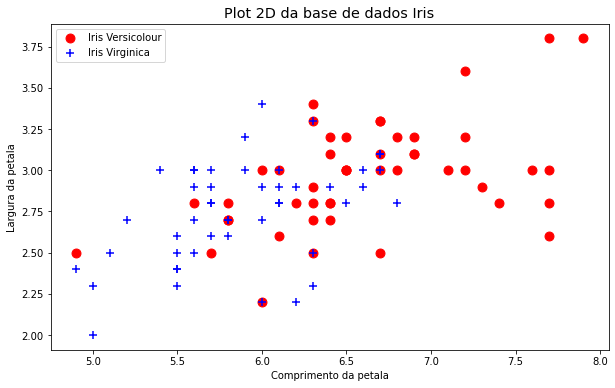

In [17]:
if __name__ == '__main__':
    # Plota a base de dados  
    visualizarDados(X2,Y2, 'Iris Versicolour', 'Iris Virginica')

    # exibe o grafico
    plt.show()

Agora, os dados serão normalizados.

In [18]:
if __name__ == '__main__':
    # Função para normalizar X
    X2_norm, mu2, sigma2 = normalizar(X2)

Agora, vamos criar manualmente um novo caso de teste.

In [19]:
if __name__ == '__main__':
    # Definição de um novo caso de teste
    x2_teste = np.array(([[5.90, 2.84]])) # Você pode testar outros valores aqui

Plotando o caso de teste junto aos dados de treinamento.


Plotanto caso de teste: [5.9000 2.8400].



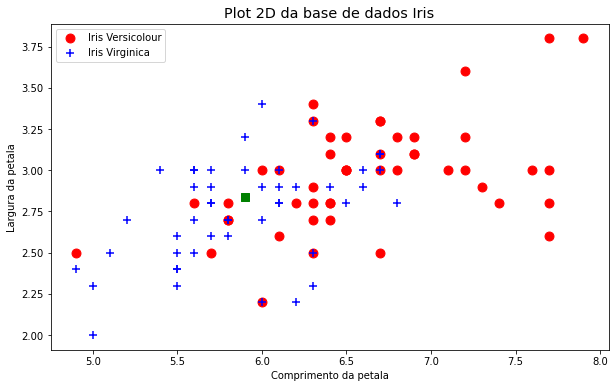

In [20]:
if __name__ == '__main__':
    print('\nPlotanto caso de teste: [%2.4f %2.4f].\n' %(x2_teste[0,0],x2_teste[0,1]))

    # Plotando os dados de treinamento 
    visualizarDados(X2,Y2, 'Iris Versicolour', 'Iris Virginica')

    # Visualizando o caso de teste junto com os dados de treinamento
    plt.scatter( x2_teste[0,0], x2_teste[0,1], marker='s', color='green', s=80)
    plt.show()

 A seguir, a amostra de teste será normalizada usando o valor de $\mu$ e $\sigma$ calculados com a base nos dados de treinamento.

In [21]:
if __name__ == '__main__':
    # Normaliza o caso de teste usando o valor de mu e sigma pré-calculado
    x2_teste_norm = (x2_teste-mu2) / sigma2

Finalmente, o $k$-NN é empregado para predizer a classe da amostra de teste. No código abaixo, você poderá alterar a quantidade de vizinhos (<tt>K</tt>).

In [22]:
if __name__ == '__main__':
    # Define a quantidade de vizinhos. Recomenda-se que seja ímpar (1, 3, ou 5)
    K = 10 # Vocé pode testar outros valores aqui

    # Chama o algoritmo do k-vizinhos para predizer o rótulo da amostra teste.
    y2, ind_viz2 = knn(x2_teste_norm, X2_norm, Y2, K)
    display(ind_viz2)

    # Exibe o rótulo da amostra de teste retornado pelo algoritmo KNN
    print('\nSegundo o KNN, a amostra de teste será classificada como:')

    # Imprime a espécie da planta de acordo com o rótulo informado
    if y2 == 0:
        print('\tClasse 0 ==> Iris Versicolour.\n')
    else:
        print('\tClasse 1 ==> Iris Virginica.\n')

array([61, 25, 20, 18, 46,  2, 10, 43, 30, 14], dtype=int64)


Segundo o KNN, a amostra de teste será classificada como:
	Classe 1 ==> Iris Virginica.



Note que a alteração no valor de $K$ no código acima, altera a classe predita pelo classificador. Para $K=1$, a amostra de teste é classificado como Iris Versicolour. Porém, para $K=3$ ou $K=5$, a amostra de teste é classificada como Iris Virginica.

Em seguida, vamos plotar o(s) vizinho(s) mais próximo(s) usado(s) na classificação.


Plotanto o(s) 10-vizinho(s) mais próximo(s) usado(s) na classificação.




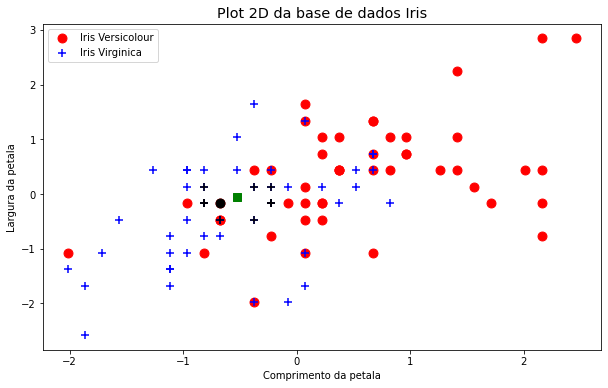

In [23]:
if __name__ == '__main__':
    print('\nPlotanto o(s) %d-vizinho(s) mais próximo(s) usado(s) na classificação.\n\n' %K)

    # Plotando os dados de treinamento 
    visualizarDados(X2_norm,Y2, 'Iris Versicolour', 'Iris Virginica')

    # Visualizando o caso de teste junto com os dados de treinamento
    plt.scatter( x2_teste_norm[0,0], x2_teste_norm[0,1], marker='s', color='green', s=80)

    for i in range(K):
        if Y2[ind_viz2[i]]==0:
            plt.scatter( X2_norm[ind_viz2[i],0], X2_norm[ind_viz2[i],1], label="Iris Versicolour", marker='o', color='black', s=80)
        else:
            plt.scatter( X2_norm[ind_viz2[i],0], X2_norm[ind_viz2[i],1], label="Iris Virginica", marker='+', color='black', s=80) 

    plt.show()

Vamos olhar a superfície de decisão gerada pelo classificador. Mude o valor de $K$ para ver diferentes superfícies de decisão. 

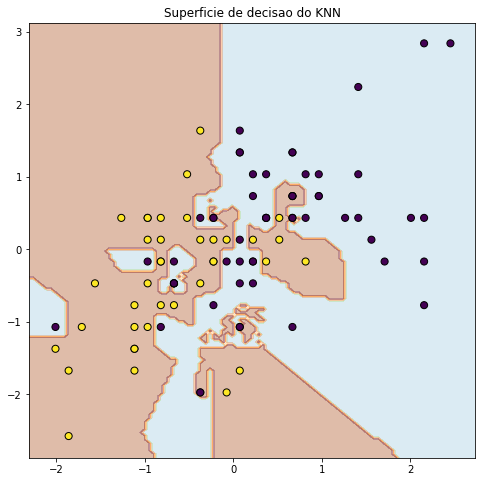

In [24]:
if __name__ == '__main__':
    # define o tamanho da figura
    fig, ax = plt.subplots(figsize=(8, 8)) 

    K=1

    # chama a funcao para plotar a superficie de decisao juntamente com os dados de teste
    plota_superficieDecisao(X2_norm, Y2, K, ax, title = "Superficie de decisao do KNN")


    plt.show()